In [432]:
# Import Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Pull csv file
mental_health_csv = "../project-one/Resources/survey.csv"

# Read csv and create df
mental_health_data = pd.read_csv(mental_health_csv)
mental_health_df = pd.DataFrame(mental_health_data)
mental_health_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [433]:
mental_health_df["Gender"].unique() 

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [434]:
list_male =['M', 'Male', 'male', 'm', 'Male-ish', 'maile',
       'something kinda male?',
       'Cis Male','Mal', 'Male (CIS)',
       'Make', 
       'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'msle',
       'Mail', 'cis male', 
       'Malr', 'Cis Man',
       'ostensibly male']
mental_health_df['Gender'] = mental_health_df['Gender'].replace(list_male, 'Male')


In [435]:
list_Female =['Female', 'female', 
       'Cis Female', 'F', 
       'Woman', 'f', 
       'Femake', 'woman', 
       'Female ', 
       'cis-female/femme', 
       'Female (cis)', 
       'femail']
mental_health_df['Gender'] = mental_health_df['Gender'].replace(list_Female, 'Female')

In [436]:
list_Other =['Trans-female', 'queer/she/they', 'non-binary',
       'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne',
       'Agender', 'Trans woman', 'Neuter', 'Female (trans)', 'queer',
       'A little about you', 'p',
       'ostensibly male, unsure what that really means']
mental_health_df['Gender'] = mental_health_df['Gender'].replace(list_Other, 'Other')

In [437]:
mental_health_df["Gender"].unique() 
mental_health_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [438]:
mental_health_df_rename = mental_health_df.rename(columns={"family_history": "Family History", 
                                            "work_interfere" : "Mental Illness Interfere",
                                           "treatment" : "Seeking Treatment",
                                            "obs_consequence" : "Heard/Observed Consequences",
                                            "wellness_program": "Employee Wellness Program",
                                            "benefits" : "Employer Benefits",
                                            "seek_help" : "Employer Provide Resources",
                                            "care_options" : "Knowledge of Options",
                                            "tech_company" : "Work in Tech",
                                            "state" : "State"
                                             })
mental_health_df_rename

,Timestamp,Age,Gender,Country,State,self_employed,Family History,Seeking Treatment,Mental Illness Interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,Heard/Observed Consequences,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [439]:
mental_health_reduced = mental_health_df_rename[["Timestamp", "Age", "Gender", "Country", "State","Family History", 
                                            "Mental Illness Interfere",
                                            "Seeking Treatment",
                                             "Heard/Observed Consequences",
                                            "Employee Wellness Program",
                                            "Employer Benefits",
                                            "Employer Provide Resources",
                                            "Knowledge of Options",
                                            "Work in Tech"]]
mental_health_reduced.head()

,Timestamp,Age,Gender,Country,State,Family History,Mental Illness Interfere,Seeking Treatment,Heard/Observed Consequences,Employee Wellness Program,Employer Benefits,Employer Provide Resources,Knowledge of Options,Work in Tech
0,2014-08-27 11:29:31,37,Female,United States,IL,No,Often,Yes,No,No,Yes,Yes,Not sure,Yes
1,2014-08-27 11:29:37,44,Male,United States,IN,No,Rarely,No,No,Don't know,Don't know,Don't know,No,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,Rarely,No,No,No,No,No,No,Yes
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Often,Yes,Yes,No,No,No,Yes,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,Never,No,No,Don't know,Yes,Don't know,No,Yes


In [462]:
knowledge_recode_df = mental_health_reduced["Knowledge of Options"]
knowledge_recode_df

0       Not sure
1             No
2             No
3            Yes
4             No
          ...   
1254          No
1255         Yes
1256         Yes
1257         Yes
1258         Yes
Name: Knowledge of Options, Length: 1259, dtype: object

In [463]:
knowledge_recode_df.loc["No"] = knowledge_recode_df.loc["Not sure"] + knowledge_recode_df.loc["No"]
knowledge_recode_df = knowledge_recode_df.drop("Not sure")
knowledge_recode_df

KeyError: 'Not sure'

In [441]:
# Create a DataFrame for Pie Chart Variables and Rename Columns
tech_df = pd.DataFrame(mental_health_reduced, columns = ["Work in Tech", "Seeking Treatment", "Employer Benefits", "Heard/Observed Consequences"])
#Rename
tech_df.head()

,Work in Tech,Seeking Treatment,Employer Benefits,Heard/Observed Consequences
0,Yes,Yes,Yes,No
1,No,No,Don't know,No
2,Yes,No,No,No
3,Yes,Yes,No,Yes
4,Yes,No,Yes,No


In [442]:
# Fiter to only those working at a tech company
filter_tech=tech_df.loc[tech_df["Work in Tech"]=="Yes"]
filter_tech.head()

,Work in Tech,Seeking Treatment,Employer Benefits,Heard/Observed Consequences
0,Yes,Yes,Yes,No
2,Yes,No,No,No
3,Yes,Yes,No,Yes
4,Yes,No,Yes,No
5,Yes,No,Yes,No


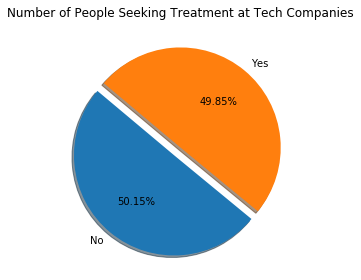

In [443]:
# Create a plot showing number of people seeking treatmnent in tech
tech_treatment = filter_tech["Seeking Treatment"].value_counts()
explode = (0.1, 0)  
tech_treatment.plot(kind="pie", title="Number of People Seeking Treatment at Tech Companies", autopct='%.2f%%', explode=explode, shadow=True, startangle=140)
plt.ylabel(None)
plt.tight_layout()
plt.show()



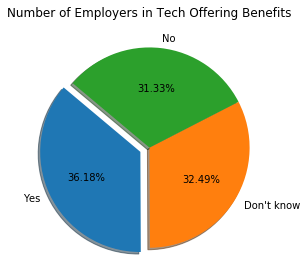

In [444]:
# Create a plot showing number of employers offering benefits in tech
tech_benefits = filter_tech["Employer Benefits"].value_counts()
explode = (0.1, 0, 0)  
tech_benefits.plot(kind="pie", title="Number of Employers in Tech Offering Benefits", autopct='%.2f%%', explode=explode,shadow=True, startangle =140)
plt.ylabel(None)
plt.tight_layout()
plt.show()



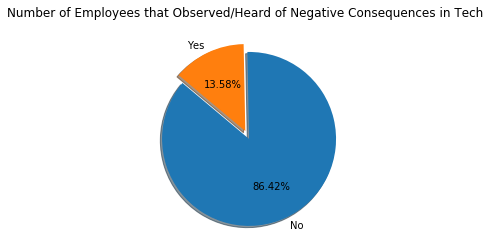

<Figure size 432x288 with 0 Axes>

In [445]:
# Create a plot showing number of people that observed/heard of negative consequences in tech
tech_consequences = filter_tech["Heard/Observed Consequences"].value_counts()
explode = (0.1, 0)  
tech_consequences.plot(kind="pie", title="Number of Employees that Observed/Heard of Negative Consequences in Tech", autopct='%.2f%%', explode=explode,shadow=True, startangle =140)
plt.ylabel(None)
plt.show()
plt.tight_layout()

In [446]:
# Fiter to only those working at a non tech company
filter_tech_no=tech_df.loc[tech_df["Work in Tech"]=="No"]
filter_tech_no.head()

,Work in Tech,Seeking Treatment,Employer Benefits,Heard/Observed Consequences
1,No,No,Don't know,No
12,No,Yes,Yes,Yes
23,No,Yes,Don't know,No
25,No,Yes,Yes,No
58,No,No,No,No


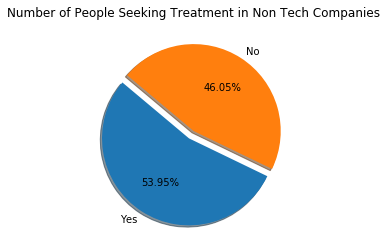

<Figure size 432x288 with 0 Axes>

In [447]:
# Create a plot showing number of people seeking treatmnent in a non tech job
no_tech_treatment = filter_tech_no["Seeking Treatment"].value_counts()
explode = (0.1, 0)  
no_tech_treatment.plot(kind="pie", title="Number of People Seeking Treatment in Non Tech Companies", autopct='%.2f%%', explode=explode,shadow=True, startangle =140)
plt.ylabel(None)
plt.show()
plt.tight_layout()

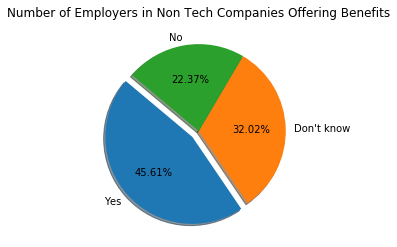

<Figure size 432x288 with 0 Axes>

In [448]:
# Create a plot showing number of employers offering benefits in a non tech job
no_tech_benefits = filter_tech_no["Employer Benefits"].value_counts()
explode = (0.1, 0, 0)  
no_tech_benefits.plot(kind="pie", title="Number of Employers in Non Tech Companies Offering Benefits", autopct='%.2f%%', explode=explode,shadow=True, startangle =140)
plt.ylabel(None)
plt.show()
plt.tight_layout()

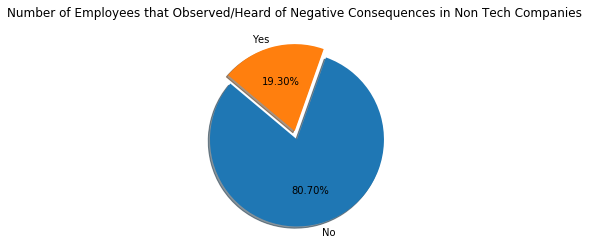

<Figure size 432x288 with 0 Axes>

In [449]:
# Create a plot showing number of people that observed/heard of negative consequences in a non tech job
no_tech_consequences = filter_tech_no["Heard/Observed Consequences"].value_counts()
explode = (0.1, 0)  
no_tech_consequences.plot(kind="pie", title="Number of Employees that Observed/Heard of Negative Consequences in Non Tech Companies", autopct='%.2f%%', explode=explode,shadow=True, startangle =140)
plt.ylabel(None)
plt.show()
plt.tight_layout()

In [450]:
#filter_tech filter_tech_no

### run a t-test 

Bar Graph

(1251, 6)


,Age,Knowledge of Options,Seeking Treatment,Employer Provide Resources,Employer Benefits,Employee Wellness Program
0,37,Not sure,Yes,Yes,Yes,No
1,44,No,No,Don't know,Don't know,Don't know
2,32,No,No,No,No,No
3,31,Yes,Yes,No,No,No
4,31,No,No,Don't know,Yes,Don't know
...,...,...,...,...,...,...
1254,26,No,Yes,No,No,No
1255,32,Yes,Yes,No,Yes,No
1256,34,Yes,Yes,No,Yes,No
1257,46,Yes,No,No,No,No


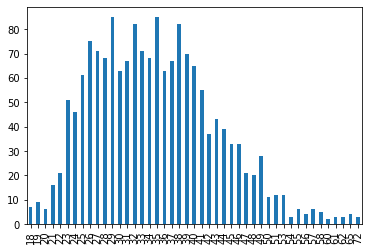

In [461]:
# Kayla and Saad's code for binning-- We can delete later. Just wanted to make sure my bar graphs worked with the bins
worker_output= pd.DataFrame(mental_health_reduced, columns=["Age","Knowledge of Options", "Seeking Treatment", "Employer Provide Resources", "Employer Benefits", "Employee Wellness Program"])
worker_output
worker_output["Age"].value_counts().sort_index().plot(kind="bar")
worker_output=worker_output[(worker_output["Age"]>= 18) & (worker_output["Age"]<= 72)].copy()
print(worker_output.shape)
worker_output["Age"].value_counts().sort_index().plot(kind="bar")
worker_output



In [452]:
# Kayla and Saad's code for binning-- We can delete later. Just wanted to make sure my bar graphs worked with the bins
bins = [0, 25, 30, 40, 72]
labels = ["Entry Level","Early/Mid Career","Mid Career", "Late Career"]
worker_output['Age Category'] = pd.cut(worker_output['Age'], bins=bins, labels=labels)
worker_output['Age Category'].value_counts()
worker_output


,Age,Knowledge of Options,Seeking Treatment,Employer Provide Resources,Employer Benefits,Employee Wellness Program,Age Category
0,37,Not sure,Yes,Yes,Yes,No,Mid Career
1,44,No,No,Don't know,Don't know,Don't know,Late Career
2,32,No,No,No,No,No,Mid Career
3,31,Yes,Yes,No,No,No,Mid Career
4,31,No,No,Don't know,Yes,Don't know,Mid Career
...,...,...,...,...,...,...,...
1254,26,No,Yes,No,No,No,Early/Mid Career
1255,32,Yes,Yes,No,Yes,No,Mid Career
1256,34,Yes,Yes,No,Yes,No,Mid Career
1257,46,Yes,No,No,No,No,Late Career


In [453]:
# Value counts treatment by age 
age_groupby= worker_output.groupby(['Age Category'])
treatment_levels = age_groupby["Seeking Treatment"].value_counts()

treatment_levels

Age Category      Seeking Treatment
Entry Level       No                   112
                  Yes                  105
Early/Mid Career  No                   193
                  Yes                  169
Mid Career        Yes                  271
                  No                   253
Late Career       Yes                   87
                  No                    61
Name: Seeking Treatment, dtype: int64

In [454]:
# Ask Saad about percentages 

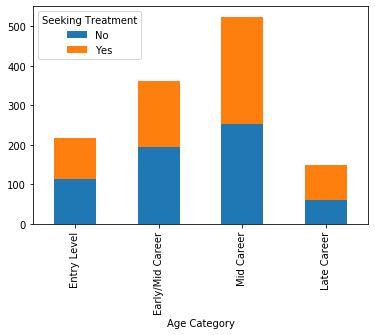

In [455]:
treatment_levels.unstack().plot(kind='bar', stacked=True)

In [456]:
# Value counts options by age 
age_groupby= worker_output.groupby(['Age Category'])
options_levels = age_groupby["Knowledge of Options"].value_counts()

options_levels

Age Category      Knowledge of Options
Entry Level       No                       90
                  Yes                      65
                  Not sure                 62
Early/Mid Career  No                      154
                  Yes                     111
                  Not sure                 97
Mid Career        No                      206
                  Yes                     195
                  Not sure                123
Late Career       Yes                      68
                  No                       49
                  Not sure                 31
Name: Knowledge of Options, dtype: int64

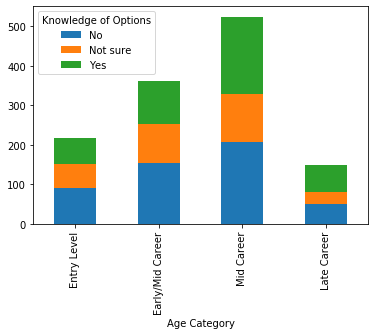

In [457]:
options_levels.unstack().plot(kind='bar', stacked=True)

In [458]:
mental_health_df["care_options"].unique()


array(['Not sure', 'No', 'Yes'], dtype=object)

In [459]:
#ec_benefits = worker_output["Employer Benefits"].replace({"Don't know": "No or Unsure", "No": "No or Unsure"})
#ec_benefits_numbers = worker_output["Employer Benefits"].value_counts()

#ec_wellness = worker_output["Employee Wellness Program"].replace({"Don't know": "No or Unsure", "No": "No or Unsure"})
#ec_wellness_numbers = worker_output["Employee Wellness Program"].value_counts()

#ec_seek_help = worker_output["Employer Provide Resources"].replace({"Don't know": "No or Unsure", "No": "No or Unsure"})
#ec_seek_help_numbers = worker_output["Employer Provide Resources"].value_counts()

In [460]:
#Early/Mid data frame with survey results 

#ec_df= pd.DataFrame ({"Benefits": ec_benefits_numbers,
#"Wellness Programs": ec_wellness_numbers, 
#"Seek Help": ec_seek_help_numbers})

#ec_df